In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [10]:
np.random.seed(42)
x = np.vstack([
    np.random.multivariate_normal([0,0], np.eye(2), 50), 
    np.random.multivariate_normal([5,5], np.eye(2), 50)
])
N, D = x.shape
K = 2

In [11]:
mean = np.random.rand(K,D) *5
covs = np.array([np.eye(D)]*K)
weights = np.ones(K)/K 
resps = np.zeros((N,K))

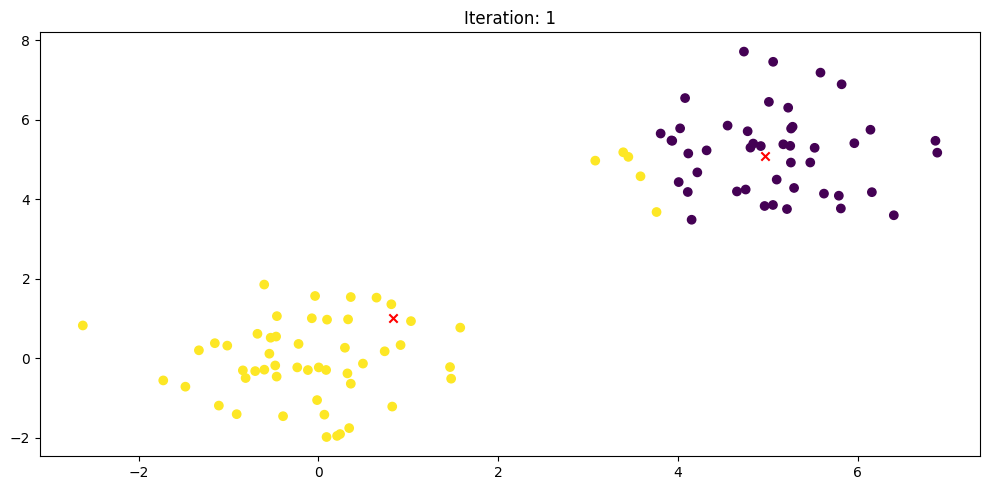

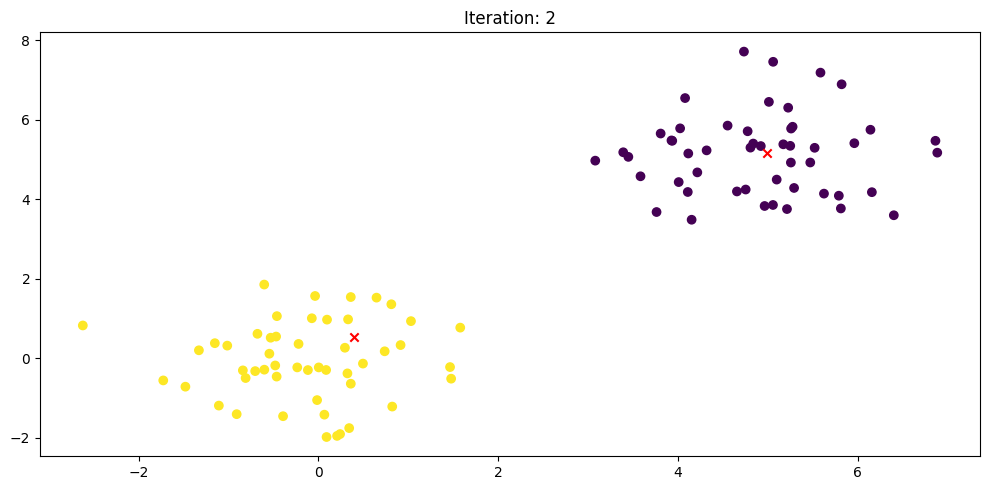

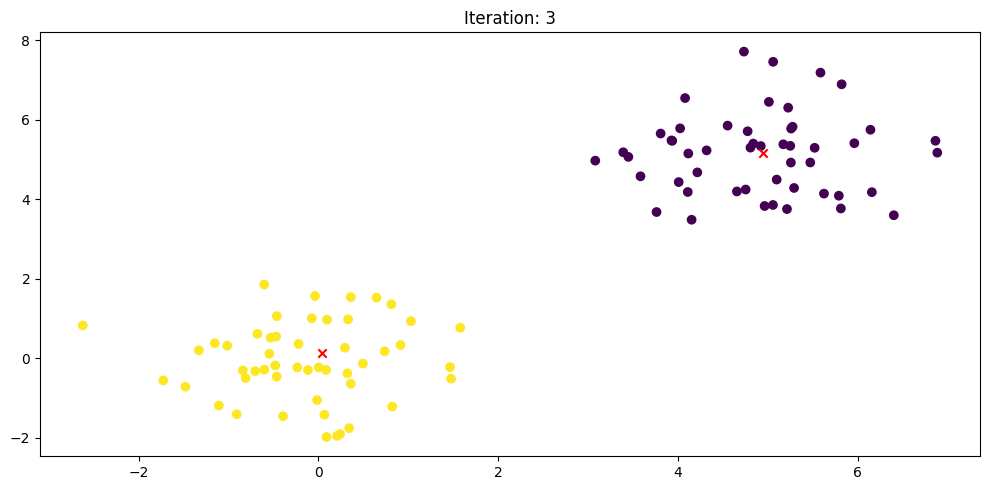

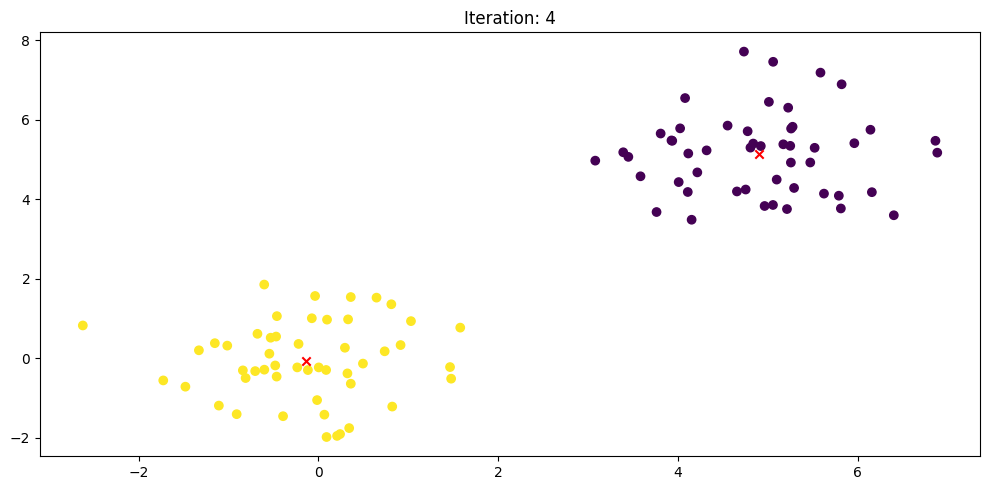

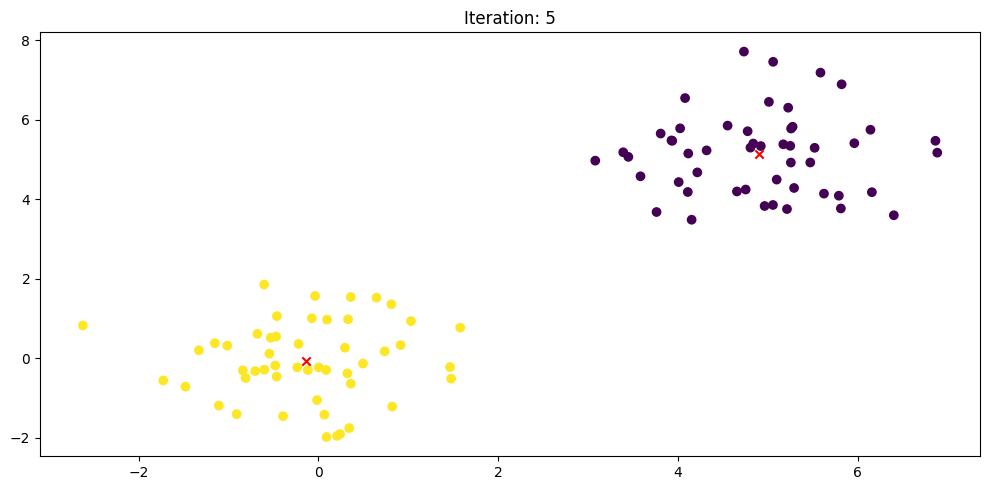

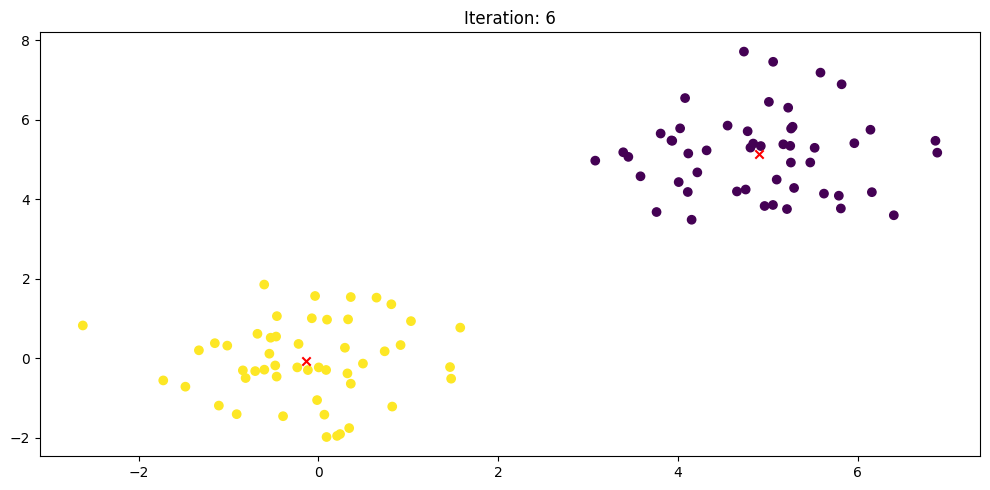

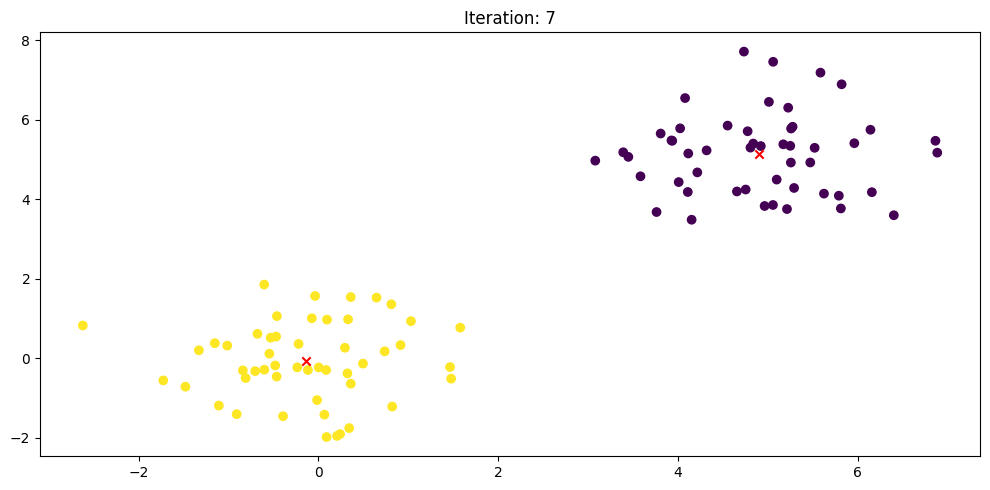

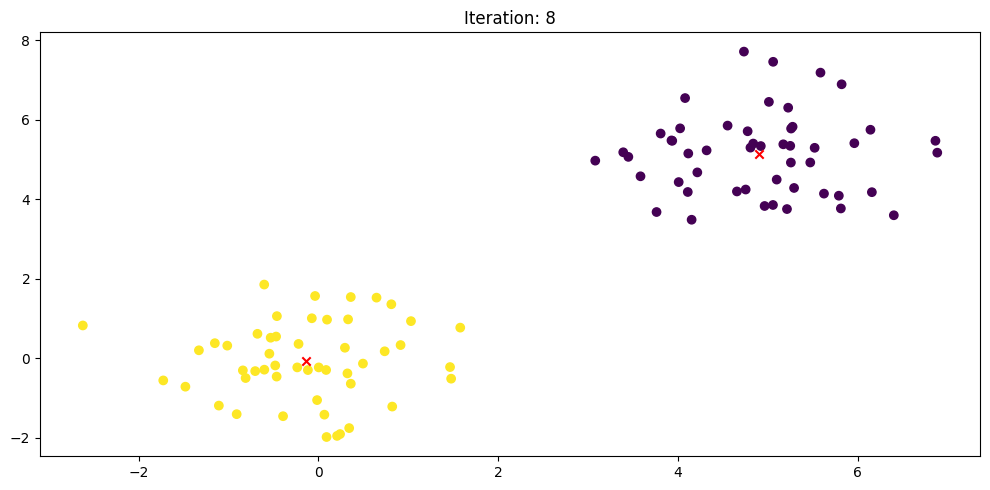

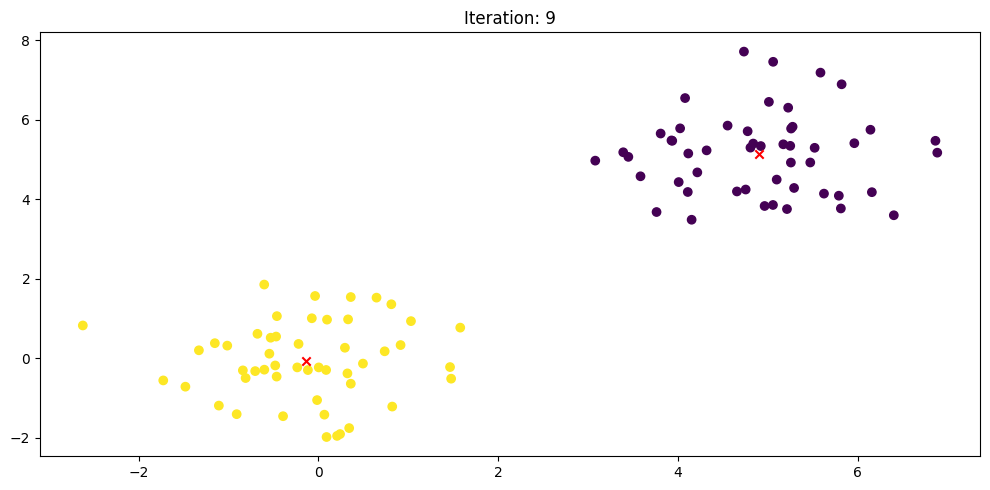

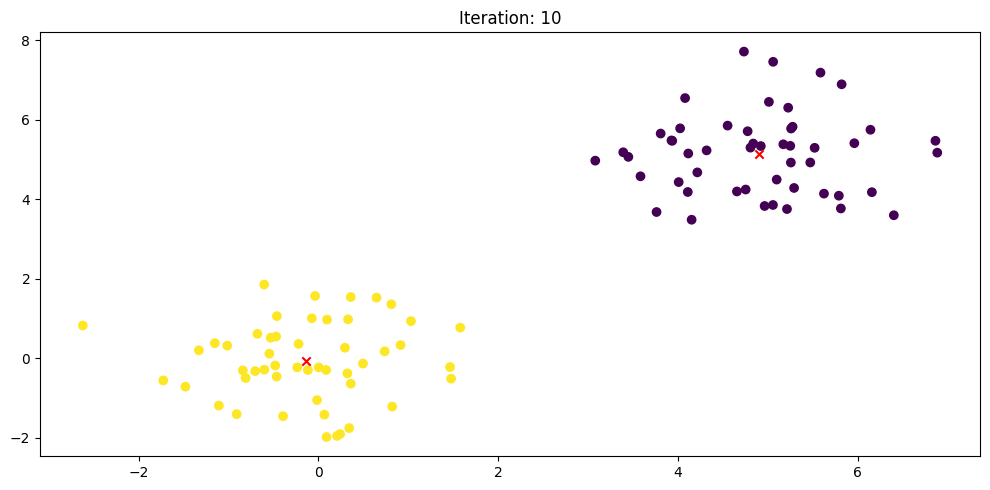

In [ ]:
for i in range(10):

    for k in range(K):
        #e step
        resps[:,k] = weights[k] * multivariate_normal.pdf(x, mean[k], covs[k])
    resps /= resps.sum(axis =1, keepdims=True)

    for k in range(K): 
        nk = resps[:,k].sum()
        mean[k] = (resps[:,k,None] *x).sum(axis=0)/nk
        diff = x - mean[k]
        covs[k] = np.dot((resps[:,k,None] * diff ).T, diff)/nk
        weights[k] = nk/N
    plt.figure(figsize=(10,5))
    plt.scatter(x[:,0], x[:,1], c=np.argmax(resps, axis=1))
    plt.scatter(mean[:,0], mean[:,1], c='red', marker='x')
    plt.title(f"Iteration: {i+1}")
    plt.tight_layout()
    plt.show()

In [ ]:
final = np.argmax(resps, axis=1)
print("Final: ")
print(final)

Final: 
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
